# Project 2 – NYC MTA Annual Ridership Trend Analysis

**Author:** Changran Zhang 
**Course:** Computing in Context 
**Date:** Nov 11, 2025

## Objective

This project analyzes how **New York City MTA ridership** changes over time across different agencies (Subway, Bus, LIRR, MNR, etc.) using the public dataset:

**“MTA Monthly Ridership & Traffic Data (Beginning January 2008)”**

We:

- load the dataset in Python,
- clean and transform the data,
- aggregate ridership by **Year** and **Agency**, and
- visualize the trends with a multi-line time series chart.

The main variables used are:

- `Month` → used to extract `Year`
- `Ridership` → number of riders
- `Agency` → type of MTA service (categorical)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Load the dataset

We read the CSV file downloaded from NYC Open Data.  
The file contains monthly ridership records by agency starting in 2008.

In [2]:
mta_path = "/Users/zcr/Desktop/MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008_20251111.csv"

# Load dataset
mta = pd.read_csv(mta_path)

# Preview the first few rows
mta.head()

,Month,Agency,Ridership
0,2008-01-01,MNR,"6,453,734"
1,2008-02-01,MNR,"6,144,377"
2,2008-03-01,MNR,"6,602,280"
3,2008-04-01,B&T,"24,900,328"
4,2008-04-01,MNR,"6,787,480"


## 2. Data cleaning and transformation

Steps:

1. Convert the `Month` column to a proper datetime type.
2. Remove commas from `Ridership` so it can be treated as numeric.
3. Extract `Year` from `Month`.
4. Group by `Year` and `Agency` to compute **average annual ridership**.

In [3]:
# Convert 'Month' to datetime
mta['Month'] = pd.to_datetime(mta['Month'], errors='coerce')

# Remove thousands separators from 'Ridership' and convert to float
mta['Ridership'] = mta['Ridership'].replace({',': ''}, regex=True).astype(float)

# Extract year from 'Month'
mta['Year'] = mta['Month'].dt.year

# Drop any rows missing key values
mta_clean = mta.dropna(subset=['Year', 'Agency', 'Ridership'])

# Calculate the average ridership per agency per year
yearly = (
    mta_clean
    .groupby(['Year', 'Agency'], as_index=False)['Ridership']
    .mean()
)

yearly.head()

,Year,Agency,Ridership
0,2008,B&T,2.529730e+07
1,2008,MNR,6.788874e+06
2,2009,B&T,2.456752e+07
3,2009,MNR,6.497963e+06
4,2010,B&T,2.457993e+07


## 3. Visualization

We now plot a line for each agency to show how average annual ridership changes over time.

This visualization helps compare long-term trends across agencies and highlights major changes in usage.

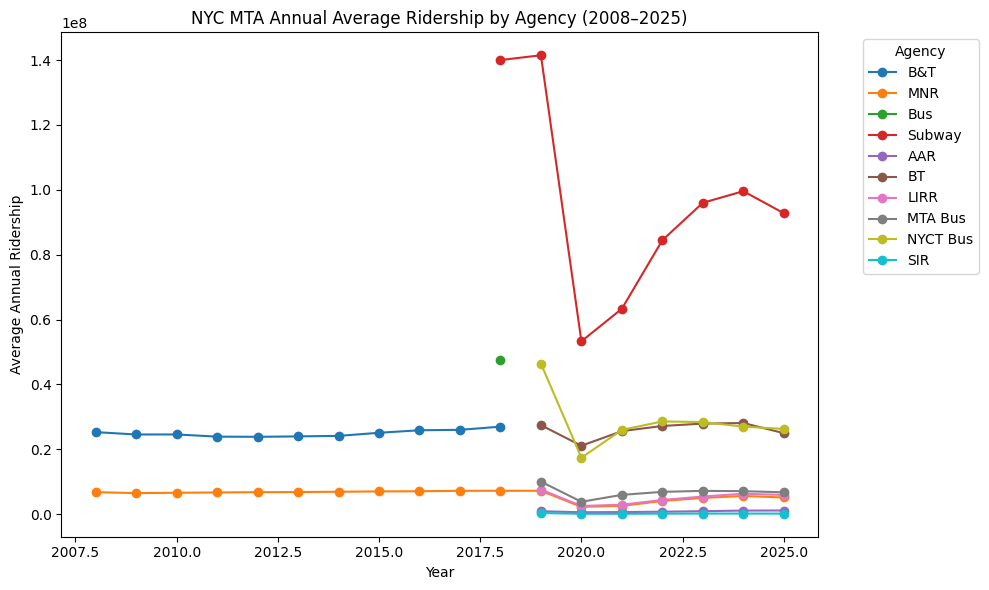

In [4]:
plt.figure(figsize=(10, 6))

for agency in yearly['Agency'].unique():
    subset = yearly[yearly['Agency'] == agency]
    plt.plot(subset['Year'], subset['Ridership'], marker='o', label=agency)

plt.title('NYC MTA Annual Average Ridership by Agency (2008–2025)')
plt.xlabel('Year')
plt.ylabel('Average Annual Ridership')
plt.legend(title='Agency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 4. Findings and Takeaways

- The chart shows how different MTA agencies evolve over time in terms of annual ridership.
- Agencies with higher lines have consistently higher usage; flatter or declining lines indicate weaker demand.
- Sharp drops (e.g., around 2020) reflect major disruptions such as the COVID-19 pandemic.
- By using `Year` (time) and `Ridership` (value) across agencies, this project provides a clear,
  code-based example of time-series visualization using real public data.

All steps — loading data, cleaning, aggregation, and visualization — are performed in Python with `pandas` and `matplotlib`.